In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:#F5291D;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">American Football for rookies</p>

Hi all,

As a French citizen who has never lived more than 3 weeks in the US, I am totally clueless about the rules of American Football. So I thought this competition whould be a good start to learn about this sport, while having fun investigating the data. The players data seems to be a good start for this journey.

I guess I am not the only newbee around so I hope this notebook will help others like me ! 

<img src="https://images.unsplash.com/photo-1512144253214-d94e86cd9189?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1931&q=80"></br>
***Photo by Adrian Curiel***




<p style="background-color:#F8F9F4;font-family:newtimeroman;color:#003CC7;font-size:150%;text-align:left;">TABLE OF CONTENT </p>
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
 
    
* [1. LOADING DATA](#1)
    
* [2. DATA CLEANING](#2)
    
* [3.1 LET'S LEARN : What are the players positions ?](#3)
    
* [3.2 LET'S LEARN : How special are the Special Teams ?](#4)  
    - [ Number and proportion of players](#4.1)
    - [ Age and month of birth analysis](#4.2)

<a id="1"></a>
# <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data </p>
Let's start by importing the useful librairies and load the data.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [ ]:
#loading data
players=pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')
print("Number of datapoints in players.csv:", len(players))

<a id="2"></a>
# <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">Data cleaning </p>
In this section my goals are to :
- identify information available in the players data
- identify missing values
- convert weights to appropriate format for future calculation
- convert dates into datetimeobject
- tidy up the data for future analysis

In [ ]:
players.info()
display(players.head())
players.tail()

- We can see from the info above that there are numeric data stored as object and that there are inconsistencies in the format of the height and birthdate columns so we need to correct this.
- There are missing data in the birthdates and college columns.

In [ ]:
print('Missing birthdates: ',players['birthDate'].isnull().sum())
print('Missing College info: ',players['collegeName'].isnull().sum())

# converting height in cm
feet =pd.to_numeric(players['height'].str.get(0))*12
heights=players['height'].str.split('-', expand=True)
inches=pd.to_numeric(heights[1])
inches=inches.fillna(value=0)
players['height_inch']=inches+feet
players['height_cm']=(inches+feet)*2.51

#converting weight in kg
players['weight_kg']=players['weight']/2.205

#converting birthdates to datetime
players['birthDate']=pd.to_datetime(players['birthDate'])

# convert player key as object
players['nflId']=players['nflId'].astype('object')

#replacing unknown characters
players['collegeName']=players['collegeName'].str.replace('&amp;', '&')

<a id="3"></a>
# <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">Now let's learn! </p>
# <p style="background-color:#F5291D;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">What are the players positions in the field ?</p>

In this section my objectives are to :
- summarize my research on the game rules and players position. 
- identify what are the Special Teams positions
- add qualitative information into the players data to make comprehension and analysis easier

 'a picture is worth more than a 1000 words' so I made a drawing to picture players and positions

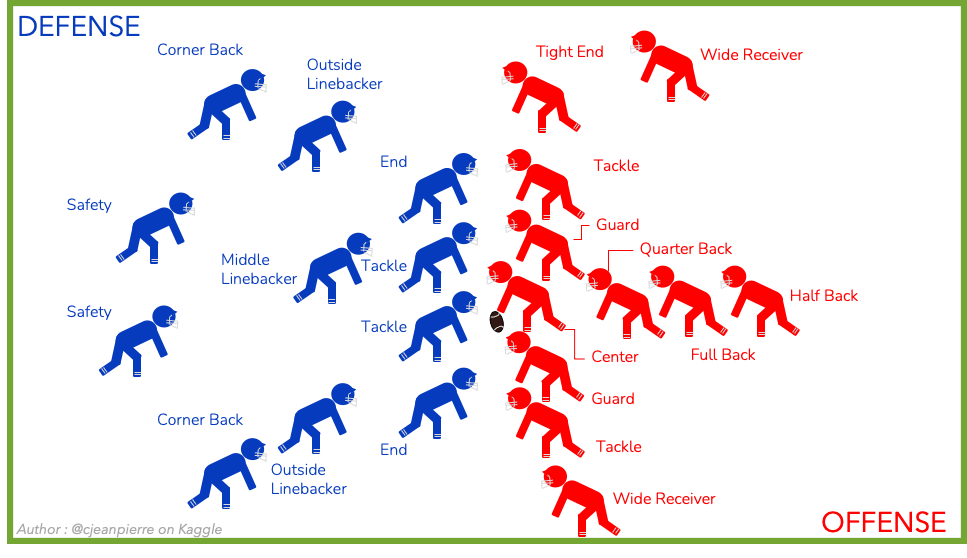

Let's see how the players dataframe look now.

In [ ]:
# identifying teams
def team_map(x):
    if x in ['SS','FS','MLB', 'ILB', 'LB','CB', 'DE','DT', 'NT', 'OLB', 'S', 'DB']: 
        return 'Defense'
    elif x in ['C', 'RB','FB', 'HB', 'OG', 'TE', 'QB', 'WR', 'OT','T', 'G']:
        return 'Offense'
    else:  #'K', 'LS', 'P'
        return 'Special Teams'

#position dictionnary
positions_dic={'SS':'Strong Safety', 'FS': 'Free Safety', 'MLB':'Middle Linebacker', 'ILB': 'Inside Linebacker', 'WR':'Wide Receiver', 'CB':'Cornerback', 'K':'Kicker', 'DB': 'Defensive back', 'OLB':'Outside Linebacker', 'DE':'Defensive End', 'TE':'Tight End',
       'T':'Tackle', 'DT': 'Defensive Tackle', 'C':'Center', 'P':'Punter', 'LS':'Long Snapper', 'RB':'Running Back', 'G':'Guard', 'NT':'Nose Tackle', 'FB': 'Fullback', 'LB':'Linebacker', 'QB':'Quarterback', 'OT':'Offensive Tackle',
       'S':'Safety', 'HB': 'Halfback', 'OG': 'Offensive Guard'}
#add positions descriptions and teams in dataframe
players['Positions_desc']=players['Position'].map(positions_dic)
players['Teams']=players['Position'].map(team_map)

#adding body mass index and age
players['bodyMassIndex']=round(players['weight_kg']/(players['height_cm']/100)**2,2)
players['age']=2021-players['birthDate'].map(lambda x: x.year)

players.head()


If you are a rookie like me, you have probably asked yourself why you did not see any Special Teams in the drawing above.<br>
Special Teams are special because they only take the field during punts, field goals, and kickoffs.

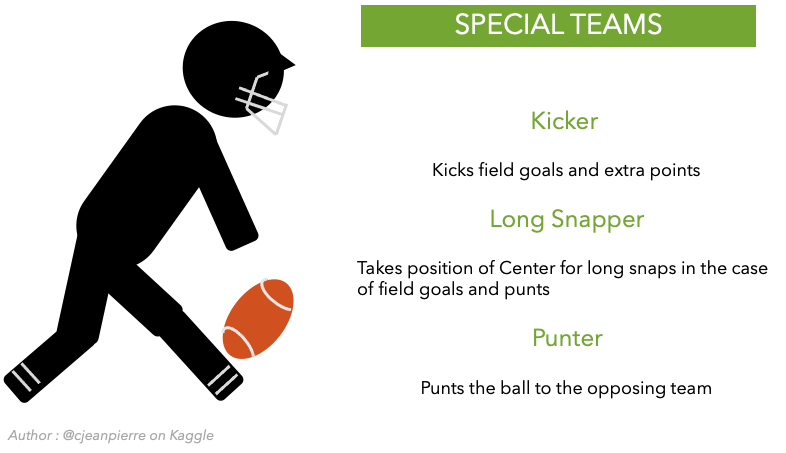
<a id="4"></a>
# <p style="background-color:#F5291D;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;">How special are the Special Teams ?</p>

In next section, I am comparing players from the Special Teams to Offense and Defense players to answer the following questions :
- How many players are there in Defense, Offense and Special Teams
- What is the proportion of Special Teams players among NFL players
- How Special Teams players differs from Defense and offense players in terms of age, and months of birth.
- How Special Teams players differs from Defense and offense players in terms of body characteristics.
- How Special Teams players differs from Defense and offense players in terms of college.



<a id="4.1"></a>
## <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:left;border-radius:5px 5px;">  Number and proportion of special teams players </p>

In [ ]:
#counting players per teams
count_players=players.groupby(['Teams']).count()[['nflId']]
count_players['Proportion']=round(count_players/count_players.sum()*100,1)

#plotting
teams_colors=['#003CC7','#F5291D','#74A633']
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 6))
for location in ['left','right', 'bottom', 'top']:
        ax1.spines[location].set_visible(False)
ax1.bar(x=count_players.index,height=count_players['nflId'],color=teams_colors)
ax1.tick_params(left=False, bottom=False)
ax1.set_yticks([])
ax1.set_title('Number of players', loc='left', weight='bold', y=1.1,fontsize=14)
for i,j in enumerate(count_players['nflId']):
    ax1.annotate(text=j, xy=(i,j), xytext=(i, j+25), fontsize=14, color='black',alpha=0.5,weight='bold', va='center', ha='center')
ax2.pie(count_players['Proportion'], explode = (0,0,0.1), autopct='%1.1f%%', startangle=180,colors=teams_colors,
        textprops=dict(color="w", weight='bold'))
ax2.axis('equal')
ax2.set_title('Proportion in NFL players', loc='center', weight='bold', y=1.1,fontsize=14)

plt.show()

There are only 155 Special Teams players and they represent less than 6% of the NFL players.

<a id="4.2"></a>
## <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:left;border-radius:5px 5px;">  Age and month of birth analysis  </p>

In [ ]:
#calculating age, weight, height and bodymass stats per teams
df_teams_stats=players.groupby(['Teams']).describe().T
age_stats=df_teams_stats.loc[['age']].reset_index().iloc[:,1:].drop(0, axis=0).set_index('level_1')
weight_stats=df_teams_stats.loc[['weight_kg']].reset_index().iloc[:,1:].drop(0, axis=0).set_index('level_1')
height_stats=df_teams_stats.loc[['height_cm']].reset_index().iloc[:,1:].drop(0, axis=0).set_index('level_1')
bodymass_stats=df_teams_stats.loc[['bodyMassIndex']].reset_index().iloc[:,1:].drop(0, axis=0).set_index('level_1')

#boxplot aesthetics
teams_palette={'Defense': '#003CC7', 'Offense':'#F5291D', 'Special Teams':'#74A633'}
flierprops = dict(marker='D', markerfacecolor='#D1501F', markersize=5,markeredgecolor='none')
medianprops = dict(linewidth=1.2, color='grey')
meanpointprops = dict( markeredgecolor='#ECE0D4',
                      markerfacecolor='#ECE0D4')
#plotting
fig1, ax1 =plt.subplots(figsize=(15,5))
for location in ['left','right', 'bottom', 'top']:
        ax1.spines[location].set_visible(False)
sns.boxplot(y="Teams", x="age", ax=ax1,data=players,palette=teams_palette, saturation=1, linewidth=0.5, 
            showmeans=True, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops)
ax1.set_title('Players Age spread per Teams', loc='left', weight='bold', y=1.1, pad=10, fontsize=14)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(left=False)

plt.table(cellText=age_stats.values.astype('int'),
          rowLabels=age_stats.index,
          colLabels=age_stats.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[0,-0.75,.4,.6])
plt.show()

Special Teams players are generally older and more experienced than Defense and Offense players: on average a Special Teams player is 3 years older than offense and defense players. The data also indicates that Special Teams players have longer careers. 25% of special teams players are 34 or more.

In [ ]:
#calculating proportion of players per month of birth and teams
players['month_bdate']=players['birthDate'].map(lambda x: x.month)
births_months=players[['nflId','Teams','month_bdate']].groupby(['Teams','month_bdate']).count()
births_months=(births_months/births_months.groupby(level=0).sum()*100).reset_index()
#plotting
fig5, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(15,5), sharey=True)
teams=['Offense', 'Defense','Special Teams']
sns.barplot(x='month_bdate',y='nflId', data=births_months, hue='Teams', ax=ax1, palette={'Defense': '#F2F2F2', 'Offense':'#F5291D', 'Special Teams':'#F2F2F2'}, saturation=1 )
sns.barplot(x='month_bdate',y='nflId', data=births_months, hue='Teams',ax=ax2, palette={'Defense': '#003CC7', 'Offense':'#F2F2F2', 'Special Teams':'#F2F2F2'}, saturation=1 )
sns.barplot(x='month_bdate',y='nflId', data=births_months, hue='Teams',ax=ax3, palette={'Defense': '#F2F2F2', 'Offense':'#F2F2F2', 'Special Teams':'#74A633'}, saturation=1 )

for ax, t in zip((ax1,ax2,ax3),teams):
    ax.legend().remove()
    ax.set_ylabel('')
    ax.set_xlabel('Month of birth')
    ax.tick_params(bottom=False ,color='grey')
    ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
    ax.set_title(t, weight='bold')
    for location in ['left','right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
ax1.text(s='Percentage of players per month of birth',x=0, y=17, weight='bold', fontsize=14)
plt.show()

<a id="4.3"></a>
## <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:left;border-radius:5px 5px;">  Body attributes analysis </p>

In [ ]:
fig2, ax2 =plt.subplots(figsize=(15,5))
for location in ['left','right', 'bottom', 'top']:
        ax2.spines[location].set_visible(False)
sns.boxplot(y="Teams", x="weight_kg", ax=ax2,data=players,palette=teams_palette, saturation=1, linewidth=0.5, 
            showmeans=True, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops)
ax2.set_title('Players Weight spread per Teams (Kg)', loc='left', weight='bold', y=1.1, pad=10, fontsize=14)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(left=False)
plt.table(cellText=weight_stats.values.round(1),
          rowLabels=weight_stats.index,
          colLabels=weight_stats.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[0,-0.75,.45,.6])
plt.show()

Special Teams are generally much lighter than other players from Defense and Offense Teams.

In [ ]:
fig3, ax3 =plt.subplots(figsize=(15,5))
for location in ['left','right', 'bottom', 'top']:
        ax3.spines[location].set_visible(False)
sns.boxplot(y="Teams", x="height_cm", ax=ax3,data=players,palette=teams_palette, saturation=1, linewidth=0.5, 
            showmeans=True, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops)
ax3.set_title('Players height spread per Teams (cm)', loc='left', weight='bold', y=1.1, pad=10, fontsize=14)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.tick_params(left=False)
plt.table(cellText=height_stats.values.astype('int'),
          rowLabels=height_stats.index,
          colLabels=height_stats.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[0,-0.75,.4,.6])
plt.show()

Special Teams are very similar to Defense players in terms of height. With a median height of 1.9 meter, Offense players are generally much taller than their colleagues in Defense or Special Teams : less than 25% of Defense and special temas are 1.9 meter tall.

In [ ]:
fig4, ax4 =plt.subplots(figsize=(15,5))
for location in ['left','right', 'bottom', 'top']:
        ax4.spines[location].set_visible(False)
sns.boxplot(y="Teams", x="bodyMassIndex", ax=ax4,data=players,palette=teams_palette, saturation=1, linewidth=0.5, 
            showmeans=True, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops)
ax4.set_title('Players body mass index spread per Teams', loc='left', weight='bold', y=1.1, pad=10, fontsize=14)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.tick_params(left=False)

plt.table(cellText=bodymass_stats.values.round(1),
          rowLabels=bodymass_stats.index,
          colLabels=bodymass_stats.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right', bbox=[0,-0.75,.4,.6])
plt.show()

Special Teams body mass index (BMI) are generally significantly lower than Offense and Defense Teams BMI.

Suprisingly, Special Teams players have a higher percentage of players born in July and February compared to Offense and Defense players 

<a id="4.4"></a>
## <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:left;border-radius:5px 5px;">  Do Special Teams go to special universities ?

In [ ]:
#percentage of players per college and per team
colleges=players[['nflId','Teams','collegeName']].groupby(['Teams','collegeName']).count()
colleges=(colleges/colleges.groupby(level=0).sum()*100).reset_index().sort_values('nflId', ascending=False)
sp_col=colleges.loc[colleges['Teams']=='Special Teams'].head(10)
def_col=colleges.loc[colleges['Teams']=='Defense'].head(10)
off_col=colleges.loc[colleges['Teams']=='Offense'].head(10)
#plotting
fig6, (ax1,ax2,ax3) =plt.subplots(3,1,figsize=(8,8), sharex=True)
sns.barplot(y='collegeName',x='nflId', data=sp_col,ax=ax3, color='#74A633', saturation=1 )
sns.barplot(y='collegeName',x='nflId', data=def_col,ax=ax2, color='#003CC7', saturation=1 )
sns.barplot(y='collegeName',x='nflId', data=off_col,ax=ax1, color='#F5291D', saturation=1)

for ax, t in zip((ax1,ax2,ax3),teams):
    ax.set_ylabel('')
    ax.tick_params(left=False ,color='grey')
    ax.set_xlabel('')
    ax.set_title(t, weight='bold', loc='left')
    for location in ['left','right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
ax3.set_xlabel('% of Teams per college')
ax1.text(s='Top 10 colleges per teams',x=0, y=-3, weight='bold', fontsize=14)
plt.show()


There seems to be a college specific to the training of Special Teams. The top 3 colleges for Special Teams are not part of the top 10 colleges for Offense and Defense Teams.

<a id="4,1"></a>
## <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:left;border-radius:5px 5px;">  Do Special Teams have special names ? </p>

In [ ]:
#getting players first names per team
names_st = players.loc[players['Teams']=='Special Teams','displayName'].str.split(' ', expand=True).loc[:,0]
names_def = players.loc[players['Teams']=='Defense','displayName'].str.split(' ', expand=True).loc[:,0]
names_off=players.loc[players['Teams']=='Offense','displayName'].str.split(' ', expand=True).loc[:,0]
#plotting
fig7, (ax1,ax2,ax3) =plt.subplots(1,3,figsize=(25,10))
wordcloud1 = WordCloud (
                    background_color = 'black',
                    width = 800,
                    height = 600, colormap='Reds'
                        ).generate(" ".join(names_off))
wordcloud2 = WordCloud (
                    background_color = 'black',
                    width = 800,
                    height = 600, colormap='Blues'
                        ).generate(" ".join(names_def))
wordcloud3 = WordCloud (
                    background_color = 'black',
                    width = 800,
                    height = 600, colormap='Greens'
                        ).generate(" ".join(names_st))

ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
ax3.imshow(wordcloud3)
plt.show()


If your name is Chris you are not special enough to be in Special Teams !

### <p style="background-color:#003CC7;font-family:newtimeroman;color:#F8F9F4;font-size:150%;text-align:center;border-radius:10px 10px;"> Thank you for reading --- This is WIP, stay tuned! <br>
<p style="background-color:#F8F9F4;font-family:newtimeroman;color:#003CC7;font-size:150%;text-align:center;border-radius:10px 10px;"> If you had fun and learnt from this : Upvote and comment!  <br> Constructive feedback is also more than welcome !</p>